<a href="https://colab.research.google.com/github/ozgurangers/respiratory-sound-diagnosis-ml/blob/main/notebooks/03_correlation_map_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation Map Generation

This notebook focuses on generating correlation maps from preprocessed tracheal respiratory sound
signals captured by multiple microphone channels. These correlation maps form the basis of the
feature extraction process used for classification.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Correlation Analysis Overview

Cross-correlation analysis is used to capture the similarity between respiratory signals
recorded from different microphone channels. The resulting correlation values are organized
into correlation maps that represent spatial relationships between channels.


In [2]:
num_channels = 4
signal_length = 8000  # 1 second

signals = np.random.randn(num_channels, signal_length)


## Cross-Correlation Computation

Pairwise correlation coefficients are computed between microphone channels
to quantify their similarity.


In [3]:
def compute_correlation_map(signals):
    num_channels = signals.shape[0]
    corr_map = np.zeros((num_channels, num_channels))

    for i in range(num_channels):
        for j in range(num_channels):
            corr_map[i, j] = np.corrcoef(signals[i], signals[j])[0, 1]

    return corr_map

corr_map = compute_correlation_map(signals)
print(corr_map)


[[ 1.00000000e+00 -4.98019865e-03  4.72870291e-04 -5.99631084e-04]
 [-4.98019865e-03  1.00000000e+00 -1.43438844e-02  4.85666410e-03]
 [ 4.72870291e-04 -1.43438844e-02  1.00000000e+00  9.29785992e-03]
 [-5.99631084e-04  4.85666410e-03  9.29785992e-03  1.00000000e+00]]


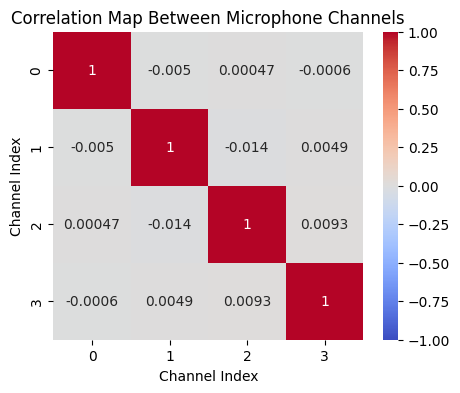

In [4]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_map, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Map Between Microphone Channels")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()


## Healthy vs Asthma Correlation Patterns

In the proposed methodology, correlation maps exhibit distinct patterns
between healthy individuals and asthma patients. Healthy subjects tend to show
stronger and more consistent correlations across specific microphone pairs,
while asthma patients generally present weaker correlation structures.


In [5]:
num_samples = 5
correlation_maps = np.array([
    compute_correlation_map(np.random.randn(num_channels, signal_length))
    for _ in range(num_samples)
])

print("Correlation maps shape:", correlation_maps.shape)


Correlation maps shape: (5, 4, 4)


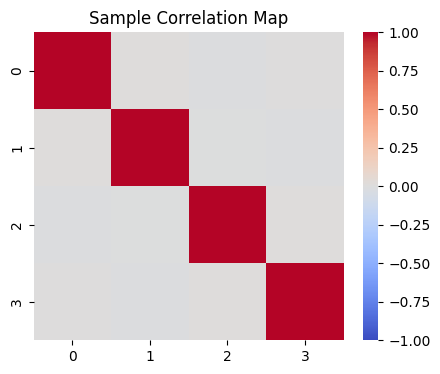

In [6]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_maps[0], cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Sample Correlation Map")
plt.show()


03_correlation_map_generation.ipynb